# Michaelis Menten

This example shows how the the Michaelis Menten model can be used.
The Michaelis Menten model is a stochastic model, more details can be found [here](https://en.wikipedia.org/wiki/Michaelis-Menten_kinetics).

Its reactions are:
$$X_1 + X_2 \xrightarrow{} X_3$$
$$X_3 \xrightarrow{} X_1 + X_2$$
$$X_3 \xrightarrow{} X_2 + X_4$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976).

In [31]:
import pints
import pints.toy.stochastic
import matplotlib.pyplot as plt
import numpy as np

Specify initial concentration, time points at which to record concentration values, and rate constant value (k)

In [32]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

The main option is to use the model's ```simulate``` function. This function, given a set of parameters and times, computes the appropriate times and values using Gillispie's algorithm and then uses interpolation to find the values at the exact times requested.

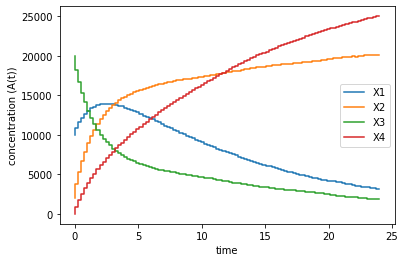

In [33]:
values = model.simulate(k, times)

plt.step(times, values[:,0], label = 'X1')
plt.step(times, values[:,1], label = 'X2')
plt.step(times, values[:,2], label = 'X3')
plt.step(times, values[:,3], label = 'X4')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

Another option for simulating the model is by using the ```simulate_raw``` function. This gives the pure Gillispie's algorithm simulations times and values, without interpolating them. Although more precise, these simulations are similar to the ones given by ```simulate```.

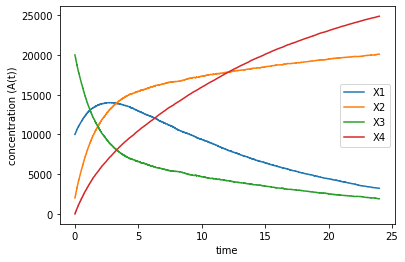

In [34]:
times, values = model.simulate_raw(k, 24)
values = np.array(values)

plt.step(times, values[:,0], label = 'X1')
plt.step(times, values[:,1], label = 'X2')
plt.step(times, values[:,2], label = 'X3')
plt.step(times, values[:,3], label = 'X4')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

Given the stochastic nature of this model we can use multiple simulations to make sure that the runs are covering the same model with the same parameters. Our simulations are close, suggesting we are obtaining accurate simulations.

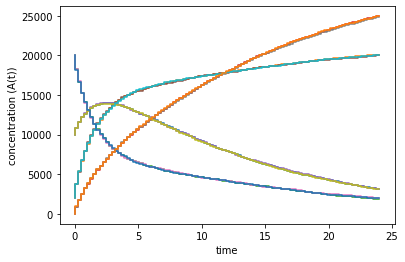

In [35]:
times = np.linspace(0, 24, 100)

for i in range(3):
    values = model.simulate(k, times)
    plt.step(times, values[:,0])
    plt.step(times, values[:,1])
    plt.step(times, values[:,2])
    plt.step(times, values[:,3])

plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()